This dataset belongs telcom_customers .This is Binary Classification problem as we have predict for churn rate of Customers



**Problem Statement**: A telecom company has the data related to its subscribers. We wants to find
out potential churn customers to find out the potential churners and to turn them into regular customers
by retaining them

Error Matric To Check :Recall ,as we want to know who are churning out from matric so we hav to check where model is predicting there not churning out but actually they are churning out.




In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
##Importing drive and mounting 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We have 4 dataset which are belongs to same set.

In [ ]:
Telco_Cust_1=pd.read_csv("/content/drive/MyDrive/ML_Project1/Telco_Customer_Call_Details1.csv")
Telco_Cust_2=pd.read_csv("/content/drive/MyDrive/ML_Project1/Telco_Customer_Call_Details2.csv")
Telco_churn_1=pd.read_csv("/content/drive/MyDrive/ML_Project1/Telco_Churn_Details1.csv")
Telco_churn_2=pd.read_csv("/content/drive/MyDrive/ML_Project1/Telco_Churn_Details2.csv")

In [ ]:
print(Telco_Cust_1.shape)
print(Telco_Cust_2.shape)
print(Telco_churn_1.shape)
print(Telco_churn_2.shape)

(500, 13)
(4500, 13)
(500, 7)
(4500, 7)


Merging data Two datasets on basis of  Cust_ID ##Inner Join

In [ ]:
Telco_data1=pd.merge(Telco_Cust_1,Telco_churn_1,on="Cust_ID")

In [ ]:
Telco_data2=pd.merge(Telco_Cust_2,Telco_churn_2,on="Cust_ID")

In [ ]:
print(Telco_data1.shape)
print(Telco_data2.shape)

(500, 19)
(4500, 19)


In [ ]:
Telco_data1.tail()

,Cust_ID,Total.Day.Minutes,Total.Day.Calls,Total.Day.Charge,Total.Eve.Minutes,Total.Eve.Calls,Total.Eve.Charge,Total.Night.Minutes,Total.Night.Calls,Total.Night.Charge,Total.Intl.Minutes,Total.Intl.Calls,Total.Intl.Charge,International.Plan,Voice.Mail.Plan,X..Vmail.Messages,X..customer.Service.Calls,Churn,trainrows
495,596,156.1,114,26.54,180.3,63,15.33,179.6,115,8.08,11.1,9,3.00,yes,no,0,2,False.,Yes
496,597,178.7,134,30.38,178.6,102,15.18,126.8,82,5.71,8.0,4,2.16,no,yes,36,2,False.,Yes
497,598,177.5,93,30.18,287.4,75,24.43,180.5,118,8.12,11.9,3,3.21,no,no,0,2,False.,Yes
498,599,211.3,61,35.92,105.6,119,8.98,175.9,63,7.92,9.7,4,2.62,yes,no,0,4,True.,Yes
499,600,175.2,91,29.78,244.4,109,20.77,75.8,95,3.41,7.5,2,2.03,no,no,0,1,False.,No


In [ ]:
Telco_data2.tail(5)

,Cust_ID,Total.Day.Minutes,Total.Day.Calls,Total.Day.Charge,Total.Eve.Minutes,Total.Eve.Calls,Total.Eve.Charge,Total.Night.Minutes,Total.Night.Calls,Total.Night.Charge,Total.Intl.Minutes,Total.Intl.Calls,Total.Intl.Charge,International.Plan,Voice.Mail.Plan,X..Vmail.Messages,X..customer.Service.Calls,Churn,trainrows
4495,5096,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,no,yes,40,2,False.,Yes
4496,5097,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,no,no,0,3,True.,Yes
4497,5098,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,no,no,0,1,False.,Yes
4498,5099,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,no,no,0,0,False.,Yes
4499,5100,129.4,102,22.00,267.1,104,22.70,154.8,100,6.97,9.3,16,2.51,no,yes,34,0,False.,Yes


In [ ]:
Telco_data=pd.concat([Telco_data1,Telco_data2],axis=0,ignore_index=True)

***EDA###***

In [ ]:
Telco_data.shape

(5000, 19)

In [ ]:
Telco_data.head(4)

,Cust_ID,Total.Day.Minutes,Total.Day.Calls,Total.Day.Charge,Total.Eve.Minutes,Total.Eve.Calls,Total.Eve.Charge,Total.Night.Minutes,Total.Night.Calls,Total.Night.Charge,Total.Intl.Minutes,Total.Intl.Calls,Total.Intl.Charge,International.Plan,Voice.Mail.Plan,X..Vmail.Messages,X..customer.Service.Calls,Churn,trainrows
0,101,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,no,yes,25,1,False.,No
1,102,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,no,yes,26,1,False.,Yes
2,103,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,no,no,0,0,False.,Yes
3,104,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,yes,no,0,2,False.,Yes


In [ ]:
Telco_data.tail()

,Cust_ID,Total.Day.Minutes,Total.Day.Calls,Total.Day.Charge,Total.Eve.Minutes,Total.Eve.Calls,Total.Eve.Charge,Total.Night.Minutes,Total.Night.Calls,Total.Night.Charge,Total.Intl.Minutes,Total.Intl.Calls,Total.Intl.Charge,International.Plan,Voice.Mail.Plan,X..Vmail.Messages,X..customer.Service.Calls,Churn,trainrows
4995,5096,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,no,yes,40,2,False.,Yes
4996,5097,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,no,no,0,3,True.,Yes
4997,5098,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,no,no,0,1,False.,Yes
4998,5099,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,no,no,0,0,False.,Yes
4999,5100,129.4,102,22.00,267.1,104,22.70,154.8,100,6.97,9.3,16,2.51,no,yes,34,0,False.,Yes


In [ ]:
Telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cust_ID                    5000 non-null   int64  
 1   Total.Day.Minutes          5000 non-null   float64
 2   Total.Day.Calls            5000 non-null   int64  
 3   Total.Day.Charge           5000 non-null   float64
 4   Total.Eve.Minutes          5000 non-null   float64
 5   Total.Eve.Calls            5000 non-null   int64  
 6   Total.Eve.Charge           5000 non-null   float64
 7   Total.Night.Minutes        5000 non-null   float64
 8   Total.Night.Calls          5000 non-null   int64  
 9   Total.Night.Charge         5000 non-null   float64
 10  Total.Intl.Minutes         5000 non-null   float64
 11  Total.Intl.Calls           5000 non-null   int64  
 12  Total.Intl.Charge          5000 non-null   float64
 13  International.Plan         5000 non-null   objec

There is no null values in Above datasets..

*Lets check for Duplicate values if there any..*

In [ ]:
Telco_data.duplicated().sum()

0

In [ ]:
Telco_data.describe()

,Cust_ID,Total.Day.Minutes,Total.Day.Calls,Total.Day.Charge,Total.Eve.Minutes,Total.Eve.Calls,Total.Eve.Charge,Total.Night.Minutes,Total.Night.Calls,Total.Night.Charge,Total.Intl.Minutes,Total.Intl.Calls,Total.Intl.Charge,X..Vmail.Messages,X..customer.Service.Calls
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2600.500000,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,7.755200,1.570400
std,1443.520003,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,13.546393,1.306363
min,101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1350.750000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,0.000000,1.000000
50%,2600.500000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,0.000000,1.000000
75%,3850.250000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,17.000000,2.000000
max,5100.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,52.000000,9.000000


By observing statical information we can say there no outliers in any attribute expect in X..Vmail.Messages we find than mean and median has some difference.

In [ ]:
Telco_data.describe(include = ['O']) # Describe all categorical columns

,International.Plan,Voice.Mail.Plan,Churn,trainrows
count,5000,5000,5000,5000
unique,2,2,2,2
top,no,no,False.,Yes
freq,4527,3677,4293,3500


In [ ]:
Cat_cols=['International.Plan','Voice.Mail.Plan']

In [ ]:
Num_cols=['X..Vmail.Messages', 'Total.Day.Minutes', 'Total.Day.Calls','Total.Day.Charge', 'Total.Eve.Minutes', 'Total.Eve.Calls','Total.Eve.Charge', 'Total.Night.Minutes', 'Total.Night.Calls',
'Total.Night.Charge', 'Total.Intl.Minutes', 'Total.Intl.Calls','Total.Intl.Charge','X..customer.Service.Calls']



In [ ]:
Num_cols


['X..Vmail.Messages',
 'Total.Day.Minutes',
 'Total.Day.Calls',
 'Total.Day.Charge',
 'Total.Eve.Minutes',
 'Total.Eve.Calls',
 'Total.Eve.Charge',
 'Total.Night.Minutes',
 'Total.Night.Calls',
 'Total.Night.Charge',
 'Total.Intl.Minutes',
 'Total.Intl.Calls',
 'Total.Intl.Charge',
 'X..customer.Service.Calls']

In [ ]:
Telco_data[Cat_cols]= Telco_data[Cat_cols].astype('category')


Visualizations

X..Vmail.Messages               AxesSubplot(0.125,0.749828;0.133621x0.130172)
Total.Day.Minutes            AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Total.Day.Calls               AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Total.Day.Charge             AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Total.Eve.Minutes            AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Total.Eve.Calls                 AxesSubplot(0.125,0.593621;0.133621x0.130172)
Total.Eve.Charge             AxesSubplot(0.285345,0.593621;0.133621x0.130172)
Total.Night.Minutes           AxesSubplot(0.44569,0.593621;0.133621x0.130172)
Total.Night.Calls            AxesSubplot(0.606034,0.593621;0.133621x0.130172)
Total.Night.Charge           AxesSubplot(0.766379,0.593621;0.133621x0.130172)
Total.Intl.Minutes              AxesSubplot(0.125,0.437414;0.133621x0.130172)
Total.Intl.Calls             AxesSubplot(0.285345,0.437414;0.133621x0.130172)
Total.Intl.Charge             AxesSubplot(0.44569,0.437414;0.133

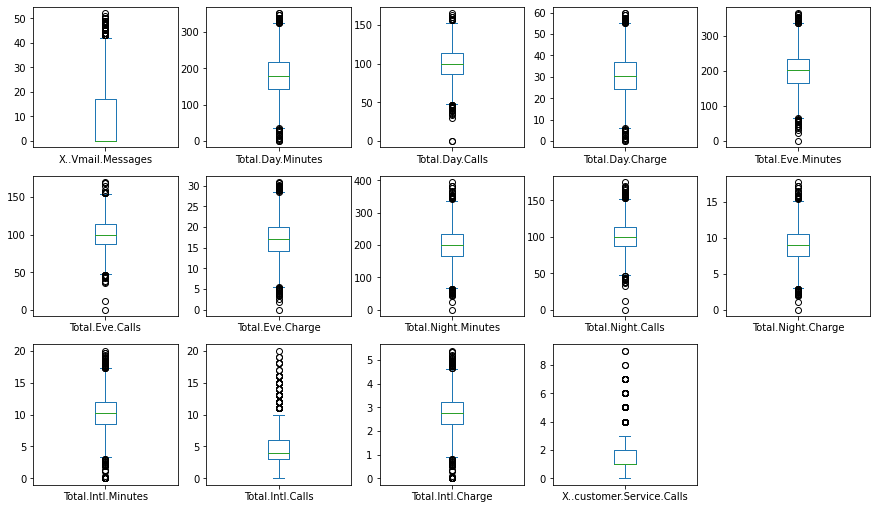

In [ ]:
Telco_data[Num_cols].plot(kind='box',subplots=True,sharex=False,sharey=False,layout=(5,5),figsize=(15,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ddb040e80>,
      dtype=object)

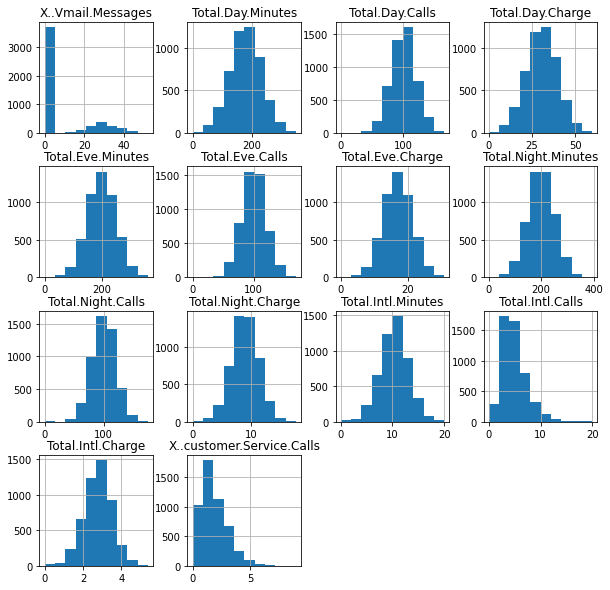

In [ ]:
Telco_data[Num_cols].hist(figsize=(10,10),bins=10)

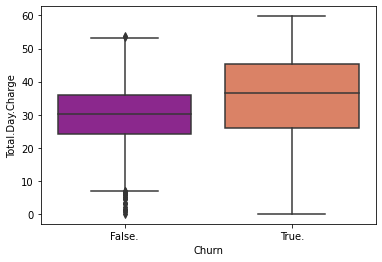

In [ ]:
sns.boxplot(x ='Churn', y ='Total.Day.Charge', data = Telco_data, palette ='plasma')
 

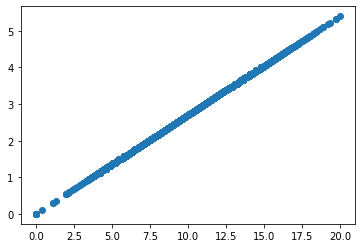

In [ ]:
plot.scatter(Telco_data["Total.Intl.Minutes"], Telco_data["Total.Intl.Charge"])
plot.show()

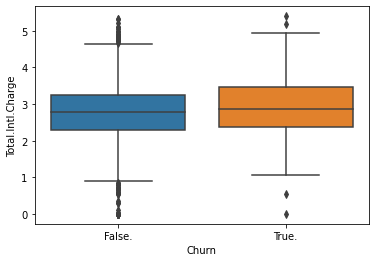

In [ ]:
sns.boxplot(x ='Churn', y ='Total.Intl.Charge', data = Telco_data)


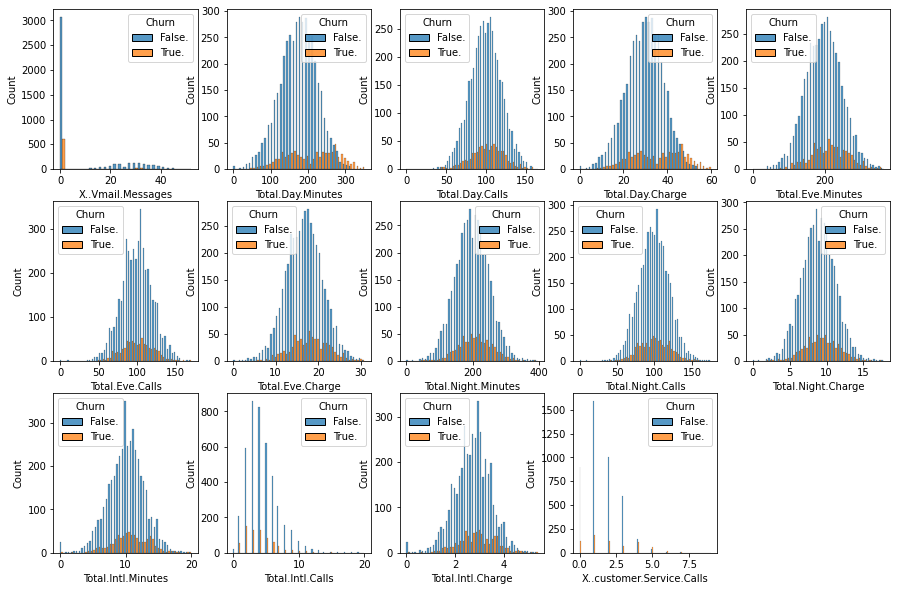

In [ ]:
plot.figure(figsize = (15,10))
for i in enumerate(Num_cols):
    plot.subplot(3,5, i[0]+1)
    _= sns.histplot(Telco_data, x=i[1], hue = 'Churn',multiple="dodge")

AS all the attributes all following normal distribution but in Total.Intl.Calls and X..customer.Service.calls we can find some extreme Spikes.

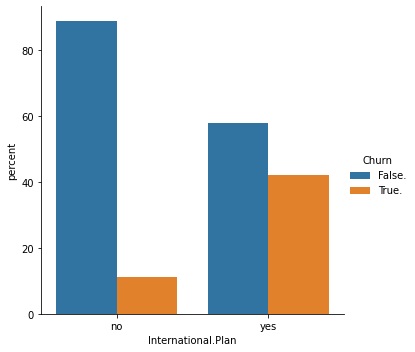

In [ ]:

(Telco_data.groupby('International.Plan')['Churn'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
.pipe((sns.catplot,'data'), x='International.Plan',y='percent',hue='Churn',kind='bar'))


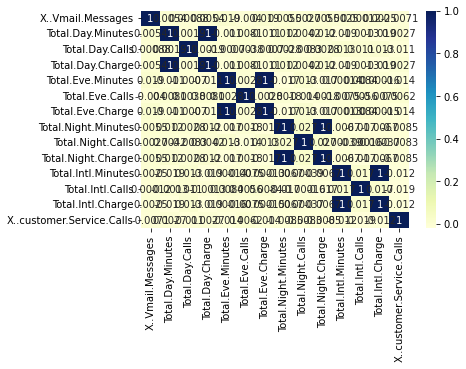

In [ ]:
data=sns.heatmap(Telco_data[Num_cols].corr(), cmap="YlGnBu", annot=True)
plot.show()

From above heatmap we find there is corelation bw Minutes and charges .As duration of minutes Increases we find thad charges also increasing.

***Here Churn is dependent feature ***

In [ ]:
Telco_data['Churn']=np.where(Telco_data['Churn']=='False.',0,1)  ##replacing False with 0 and True with 1.

In [ ]:
Telco_data['trainrows']=np.where(Telco_data['trainrows']=='No',0,1) #Based on this trainrows column we have to split data into trainrows and test rows.

In [ ]:
Telco_data[Cat_cols]= Telco_data[Cat_cols].astype('category')


In [ ]:
Telco_data.describe()

,Cust_ID,Total.Day.Minutes,Total.Day.Calls,Total.Day.Charge,Total.Eve.Minutes,Total.Eve.Calls,Total.Eve.Charge,Total.Night.Minutes,Total.Night.Calls,Total.Night.Charge,Total.Intl.Minutes,Total.Intl.Calls,Total.Intl.Charge,X..Vmail.Messages,X..customer.Service.Calls,Churn,trainrows
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2600.500000,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,7.755200,1.570400,0.141400,0.700000
std,1443.520003,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,13.546393,1.306363,0.348469,0.458303
min,101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1350.750000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,0.000000,1.000000,0.000000,0.000000
50%,2600.500000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,0.000000,1.000000,0.000000,1.000000
75%,3850.250000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,17.000000,2.000000,0.000000,1.000000
max,5100.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,52.000000,9.000000,1.000000,1.000000


In [ ]:
Q1=Telco_data[Num_cols].quantile(0.25)
Q3=Telco_data[Num_cols].quantile(0.75)
IQR=Q3-Q1

In [ ]:

lower_limit=Q1-1.5*IQR
Upper_limit=Q3+1.5*IQR
lower_limit

X..Vmail.Messages           -25.5000
Total.Day.Minutes            34.9500
Total.Day.Calls              48.0000
Total.Day.Charge              5.9500
Total.Eve.Minutes            64.7875
Total.Eve.Calls              46.5000
Total.Eve.Charge              5.5000
Total.Night.Minutes          65.2000
Total.Night.Calls            48.0000
Total.Night.Charge            2.9350
Total.Intl.Minutes            3.2500
Total.Intl.Calls             -1.5000
Total.Intl.Charge             0.8900
X..customer.Service.Calls    -0.5000
dtype: float64

In [ ]:
Upper_limit

X..Vmail.Messages             42.5000
Total.Day.Minutes            324.9500
Total.Day.Calls              152.0000
Total.Day.Charge              55.2300
Total.Eve.Minutes            335.6875
Total.Eve.Calls              154.5000
Total.Eve.Charge              28.5400
Total.Night.Minutes          336.4000
Total.Night.Calls            152.0000
Total.Night.Charge            15.1350
Total.Intl.Minutes            17.2500
Total.Intl.Calls              10.5000
Total.Intl.Charge              4.6500
X..customer.Service.Calls      3.5000
dtype: float64

In [ ]:
#Telco_data_no_out=Telco_data.filter([(Telco_data[Num_cols]<lower_limit)|(Telco_data[Num_cols]>Upper_limit)])

##**Encoding**
#As we Categorical Attributes in data set.That attributes are stored in Cat_cols so we do encoding.     
#Ways to deal with categorical variables..
#1.Using get_dummies function
#2.One-hotEncoding 
#3.labelEncoding

In [ ]:
Telco_data1= pd.get_dummies(Telco_data,columns=Cat_cols,drop_first=True)

In [ ]:
Telco_data1.shape

(5000, 19)

In [ ]:
Telco_data1.drop(['Cust_ID'],axis=1,inplace=True)

In [ ]:
Telco_data2=Telco_data1.copy()

**Spliting Given data into train_rows and test_rows based on given attribute trainrows.. where X_train, X_val and X_test contains a predictors and Y_train ,Y_val and Y_test data contains Target column.**

Since this is the only data available, we keep aside a test set to evaluate our model at the very end to estimate our chosen model's performance on unseen data. A validation set is also created, which we'll use in our baseline models to evaluate and tune our models:

*italicized text*

In [ ]:
train_rows=Telco_data1.loc[(Telco_data1['trainrows']!=0)]

In [ ]:
test_rows=Telco_data1.loc[(Telco_data1['trainrows']==0)]

In [ ]:
X=train_rows.drop(['Churn'],axis=1)

In [ ]:
Y=train_rows['Churn']

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.30,random_state=999,stratify=Y)

In [ ]:
X_test=test_rows.drop(['Churn'],axis=1)

In [ ]:
Y_test=test_rows['Churn']

In [ ]:
X_train.shape

(2450, 17)

In [ ]:
X_train.tail(5)

,Total.Day.Minutes,Total.Day.Calls,Total.Day.Charge,Total.Eve.Minutes,Total.Eve.Calls,Total.Eve.Charge,Total.Night.Minutes,Total.Night.Calls,Total.Night.Charge,Total.Intl.Minutes,Total.Intl.Calls,Total.Intl.Charge,X..Vmail.Messages,X..customer.Service.Calls,trainrows,International.Plan_yes,Voice.Mail.Plan_yes
1744,239.4,94,40.70,259.4,88,22.05,238.0,132,10.71,7.7,3,2.08,26,0,1,0,1
2286,148.7,105,25.28,167.3,105,14.22,270.6,105,12.18,10.4,7,2.81,42,0,1,0,1
3343,209.8,77,35.67,164.1,90,13.95,159.7,100,7.19,9.0,4,2.43,39,1,1,0,1
1047,144.4,87,24.55,266.5,128,22.65,217.6,59,9.79,7.1,7,1.92,0,0,1,0,0
1862,254.7,103,43.30,252.2,80,21.44,178.1,103,8.01,8.0,3,2.16,0,0,1,1,0


In [ ]:
X_train.groupby('trainrows').count()

,Total.Day.Minutes,Total.Day.Calls,Total.Day.Charge,Total.Eve.Minutes,Total.Eve.Calls,Total.Eve.Charge,Total.Night.Minutes,Total.Night.Calls,Total.Night.Charge,Total.Intl.Minutes,Total.Intl.Calls,Total.Intl.Charge,X..Vmail.Messages,X..customer.Service.Calls,International.Plan_yes,Voice.Mail.Plan_yes
trainrows,,,,,,,,,,,,,,,,
1,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450,2450


In [ ]:
X_val.groupby('trainrows').count()

,Total.Day.Minutes,Total.Day.Calls,Total.Day.Charge,Total.Eve.Minutes,Total.Eve.Calls,Total.Eve.Charge,Total.Night.Minutes,Total.Night.Calls,Total.Night.Charge,Total.Intl.Minutes,Total.Intl.Calls,Total.Intl.Charge,X..Vmail.Messages,X..customer.Service.Calls,International.Plan_yes,Voice.Mail.Plan_yes
trainrows,,,,,,,,,,,,,,,,
1,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050


In [ ]:
print(X_train.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_val.shape)
print(X_test.shape)
print(Y_test.shape)

(2450, 17)
(1050, 17)
(2450,)
(1050,)
(1500, 17)
(1500,)


In [ ]:
Y_val.value_counts(normalize=True)*100

0    85.619048
1    14.380952
Name: Churn, dtype: float64

In [ ]:
Y_train.value_counts(normalize=True)*100

0    85.673469
1    14.326531
Name: Churn, dtype: float64

In [ ]:
Y_test.value_counts(normalize=True)*100

0    86.333333
1    13.666667
Name: Churn, dtype: float64

Standardization and Normalization are two ways to deal with numerical columns.

*# #### Standardizing the data (numerical attributes only) -  Importing StandardScaler...This technique is to re-scale features values.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit(X_train[Num_cols])

StandardScaler()

In [ ]:
X_train[Num_cols]=scaler.transform(X_train[Num_cols])
X_val[Num_cols]=scaler.transform(X_val[Num_cols])
X_test[Num_cols]=scaler.transform(X_test[Num_cols])

As trainrows attribute is not useful at all we can drop from X_train,X_val and X_test

In [ ]:
X_train=X_train.drop('trainrows',axis=1)

In [ ]:
X_val=X_val.drop('trainrows',axis=1)

In [ ]:
X_test=X_test.drop('trainrows',axis=1)

In [ ]:
X_train.head()

,Total.Day.Minutes,Total.Day.Calls,Total.Day.Charge,Total.Eve.Minutes,Total.Eve.Calls,Total.Eve.Charge,Total.Night.Minutes,Total.Night.Calls,Total.Night.Charge,Total.Intl.Minutes,Total.Intl.Calls,Total.Intl.Charge,X..Vmail.Messages,X..customer.Service.Calls,International.Plan_yes,Voice.Mail.Plan_yes
1197,0.772207,-1.005230,0.771704,0.274438,0.171283,0.275344,1.820089,-0.549673,1.819631,0.577800,-0.576377,0.573166,-0.585889,1.895440,0,0
3515,1.045079,-0.450735,1.045457,0.058447,-0.834091,0.058881,0.916653,-0.953723,0.915093,0.577800,-0.172220,0.573166,1.517781,-0.413773,0,1
349,-1.362179,-1.862176,-1.362242,-1.883476,-1.688659,-1.884580,0.853115,-1.307267,0.853320,0.902027,-0.576377,0.906760,-0.585889,1.895440,0,0
3342,-0.038934,0.002942,-0.038558,-1.051509,-0.582748,-1.051668,-0.117831,-0.398154,-0.117404,0.577800,-1.384691,0.573166,2.533345,-1.183511,0,1
425,0.243283,1.565609,0.242890,-0.287540,0.020477,-0.286989,0.100582,1.521083,0.098803,0.217548,-0.172220,0.212885,-0.585889,-0.413773,1,0


Model Building using logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
logistic_model=LogisticRegression(penalty='l2',solver='sag')

In [ ]:

logistic_model.fit(X_train,Y_train)

LogisticRegression(solver='sag')

In [ ]:
train_preds=logistic_model.predict(X_train)
val_preds=logistic_model.predict(X_val)
train_preds_prob=logistic_model.predict_proba(X_train)[:,1]
val_preds_prob=logistic_model.predict_proba(X_val)[:,1]

In [ ]:

logistic_model.coef_

array([[ 0.31751369, -0.04336251,  0.31665394,  0.17151775,  0.03869382,
         0.17699417,  0.10350538, -0.01706757,  0.0983649 ,  0.11684774,
        -0.18088851,  0.11532719,  0.42868601,  0.69758585,  2.26377096,
        -1.93828178]])

In [ ]:

from sklearn.metrics import confusion_matrix,classification_report


In [ ]:
confusion_matrix(Y_train,train_preds)

array([[2042,   57],
       [ 277,   74]])

##lets import error matrices for computing the model perfomances.

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [ ]:
def evaluate_model(act, pred):
    print("Confusion Matrix \n", confusion_matrix(act, pred))
    print("Accurcay : ", accuracy_score(act, pred))
    print("Recall   : ", recall_score(act, pred))
    print("Precision: ", precision_score(act, pred))    

In [ ]:
train_accuracy_1= accuracy_score(Y_train,train_preds)
train_recall_1= recall_score(Y_train,train_preds)
train_precision_1= precision_score(Y_train,train_preds)

val_accuracy_1= accuracy_score(Y_val,val_preds)
val_recall_1= recall_score(Y_val,val_preds)
val_precision_1= precision_score(Y_val,val_preds)

In [ ]:
print(classification_report(Y_train,train_preds))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2099
           1       0.56      0.21      0.31       351

    accuracy                           0.86      2450
   macro avg       0.72      0.59      0.62      2450
weighted avg       0.84      0.86      0.84      2450



In [ ]:
print(classification_report(Y_val,val_preds))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       899
           1       0.50      0.23      0.32       151

    accuracy                           0.86      1050
   macro avg       0.69      0.60      0.62      1050
weighted avg       0.83      0.86      0.83      1050



In [ ]:
model_performance = pd.DataFrame(np.array(['Logistic - Reg_Ridge',train_accuracy_1,train_recall_1,train_precision_1,
                                           val_accuracy_1,val_recall_1,val_precision_1]).reshape(1,7))

model_performance.columns = ['Model','Train Accuracy','Train Recall','Train Precision',
                             'Val Accuracy','Val Recall','Val Precision']

In [ ]:
model_performance

,Model,Train Accuracy,Train Recall,Train Precision,Val Accuracy,Val Recall,Val Precision
0,Logistic - Reg_Ridge,0.8636734693877551,0.21082621082621084,0.5648854961832062,0.8561904761904762,0.23178807947019867,0.5


As we  see there is very low recall in both train and val.

In [ ]:
from sklearn.metrics import roc_curve ,auc

In [ ]:
# ROC and AUC:

fpr, tpr, threshold = roc_curve(Y_train, train_preds_prob)
roc_auc = auc(fpr, tpr)

In [ ]:
%matplotlib notebook
plot.figure()
plot.plot([0,1],[0,1],color='navy', lw=2, linestyle='--')
plot.plot(fpr,tpr,color='orange', lw=3, label='ROC curve (area = %0.2f)' % roc_auc)

plot.xlabel('FPR')
plot.ylabel('TPR')
plot.legend(loc="lower right")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# lasso regularization technique is used for feature selection at model level

In [ ]:
X_train1=X_train.copy()

In [ ]:
X_test1=X_test.copy()

In [ ]:
X_train.columns

Index(['Total.Day.Minutes', 'Total.Day.Calls', 'Total.Day.Charge',
       'Total.Eve.Minutes', 'Total.Eve.Calls', 'Total.Eve.Charge',
       'Total.Night.Minutes', 'Total.Night.Calls', 'Total.Night.Charge',
       'Total.Intl.Minutes', 'Total.Intl.Calls', 'Total.Intl.Charge',
       'X..Vmail.Messages', 'X..customer.Service.Calls',
       'International.Plan_yes', 'Voice.Mail.Plan_yes'],
      dtype='object')

In [ ]:
logistic_model=LogisticRegression(penalty='l1',solver="saga",class_weight="balanced")

In [ ]:
logistic_model.fit(X_train,Y_train)

LogisticRegression(class_weight='balanced', penalty='l1', solver='saga')

In [ ]:
train_preds = logistic_model.predict(X_train)
train_preds_prob=logistic_model.predict_proba(X_train)[:,1]
val_preds = logistic_model.predict(X_val)
val_preds_prob=logistic_model.predict_proba(X_val)[:,1]

In [ ]:
np.round(logistic_model.coef_,3)

array([[ 0.332, -0.022,  0.319,  0.178,  0.089,  0.161,  0.139, -0.032,
         0.089,  0.143, -0.096,  0.083,  0.647,  0.785,  2.563, -2.426]])

In [ ]:
X_train.columns

Index(['Total.Day.Minutes', 'Total.Day.Calls', 'Total.Day.Charge',
       'Total.Eve.Minutes', 'Total.Eve.Calls', 'Total.Eve.Charge',
       'Total.Night.Minutes', 'Total.Night.Calls', 'Total.Night.Charge',
       'Total.Intl.Minutes', 'Total.Intl.Calls', 'Total.Intl.Charge',
       'X..Vmail.Messages', 'X..customer.Service.Calls',
       'International.Plan_yes', 'Voice.Mail.Plan_yes'],
      dtype='object')

In [ ]:
train_accuracy_2= accuracy_score(Y_train,train_preds)
train_recall_2= recall_score(Y_train,train_preds)
train_precision_2= precision_score(Y_train,train_preds)

val_accuracy_2= accuracy_score(Y_val,val_preds)
val_recall_2= recall_score(Y_val,val_preds)
val_precision_2= precision_score(Y_val,val_preds)

In [ ]:
print(classification_report(Y_train,train_preds))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86      2099
           1       0.37      0.76      0.50       351

    accuracy                           0.78      2450
   macro avg       0.66      0.77      0.68      2450
weighted avg       0.87      0.78      0.81      2450



In [ ]:

print(classification_report(Y_val,val_preds))

              precision    recall  f1-score   support

           0       0.95      0.76      0.85       899
           1       0.35      0.78      0.49       151

    accuracy                           0.76      1050
   macro avg       0.65      0.77      0.67      1050
weighted avg       0.87      0.76      0.79      1050



In [ ]:
lasso = np.array(['Logistic - L1',train_accuracy_2,train_recall_2,
                          train_precision_2,val_accuracy_2,val_recall_2,
                          val_precision_2]).reshape(1,7)
model_performance = model_performance.append(pd.DataFrame(lasso,columns=model_performance.columns))

In [ ]:
model_performance

,Model,Train Accuracy,Train Recall,Train Precision,Val Accuracy,Val Recall,Val Precision
0,Logistic - Reg_Ridge,0.8636734693877551,0.21082621082621084,0.5648854961832062,0.8561904761904762,0.23178807947019867,0.5
0,Logistic - L1,0.7804081632653062,0.7606837606837606,0.37031900138696255,0.7638095238095238,0.7814569536423841,0.35435435435435436


DECISIONTREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
import graphviz
from sklearn.model_selection import GridSearchCV


In [ ]:
dtclf = DecisionTreeClassifier()

In [ ]:
dtclf.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
importances = dtclf.feature_importances_
importances

array([0.14207667, 0.03772588, 0.10330739, 0.0707462 , 0.02740371,
       0.06130432, 0.03402049, 0.0216895 , 0.029703  , 0.0218888 ,
       0.08161691, 0.0974603 , 0.05016591, 0.11333637, 0.08359447,
       0.02396008])

In [ ]:
indices = np.argsort(importances)[::-1]
ind_attr_names = X_train.columns
pd.DataFrame([ind_attr_names[indices], np.sort(importances)[::-1]])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Total.Day.Minutes,X..customer.Service.Calls,Total.Day.Charge,Total.Intl.Charge,International.Plan_yes,Total.Intl.Calls,Total.Eve.Minutes,Total.Eve.Charge,X..Vmail.Messages,Total.Day.Calls,Total.Night.Minutes,Total.Night.Charge,Total.Eve.Calls,Voice.Mail.Plan_yes,Total.Intl.Minutes,Total.Night.Calls
1,0.142077,0.113336,0.103307,0.09746,0.083594,0.081617,0.070746,0.061304,0.050166,0.037726,0.03402,0.029703,0.027404,0.02396,0.021889,0.02169


In [ ]:
dot_data = export_graphviz(dtclf, 
                           feature_names=ind_attr_names,
                           class_names=['No', 'Yes'], 
                           filled=True) 

graph = graphviz.Source(dot_data) 

graph.render("/content/drive/My Drive/ML_Project1/Decision_Trees/ClassificationTree", view=True) 

'/content/drive/My Drive/ML_Project1/Decision_Trees/ClassificationTree.pdf'

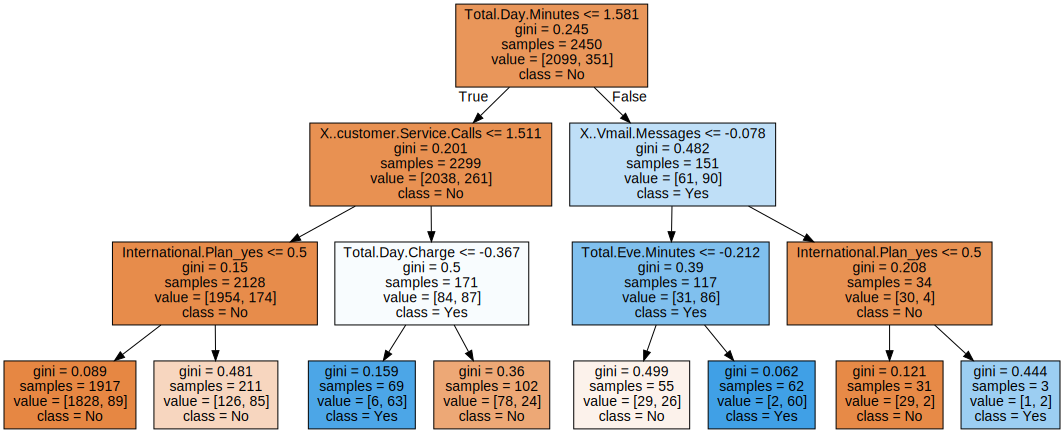

In [ ]:
dtclf2 = DecisionTreeClassifier(max_depth=3) 
dtclf2.fit(X_train, Y_train)
dot_data2 = export_graphviz(dtclf2, 
                           feature_names=ind_attr_names,
                           class_names=['No', 'Yes'], 
                           filled=True) 

graph2 = graphviz.Source(dot_data2) 
graph2

In [ ]:
train_pred_dt = dtclf.predict(X_train)
val_pred_dt = dtclf.predict(X_val)

In [ ]:
print("--Train--")
evaluate_model(Y_train, train_pred_dt)
print("--Val--")
evaluate_model(Y_val, val_pred_dt)

--Train--
Confusion Matrix 
 [[2099    0]
 [   0  351]]
Accurcay :  1.0
Recall   :  1.0
Precision:  1.0
--Val--
Confusion Matrix 
 [[844  55]
 [ 47 104]]
Accurcay :  0.9028571428571428
Recall   :  0.6887417218543046
Precision:  0.6540880503144654


In [ ]:
print(classification_report(Y_train,train_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2099
           1       1.00      1.00      1.00       351

    accuracy                           1.00      2450
   macro avg       1.00      1.00      1.00      2450
weighted avg       1.00      1.00      1.00      2450



In [ ]:

print(classification_report(Y_val,val_pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       899
           1       0.65      0.69      0.67       151

    accuracy                           0.90      1050
   macro avg       0.80      0.81      0.81      1050
weighted avg       0.91      0.90      0.90      1050



In [ ]:
train_accuracy_dt= accuracy_score(Y_train,train_pred_dt)
train_recall_dt= recall_score(Y_train,train_pred_dt)
train_precision_dt= precision_score(Y_train,train_pred_dt)

val_accuracy_dt= accuracy_score(Y_val,val_pred_dt)
val_recall_dt= recall_score(Y_val,val_pred_dt)
val_precision_dt= precision_score(Y_val,val_pred_dt)

In [ ]:
Decision_tree = np.array(['DT',train_accuracy_dt,train_recall_dt,
                          train_precision_dt,val_accuracy_dt,val_recall_dt,
                          val_precision_dt]).reshape(1,7)
model_performance = model_performance.append(pd.DataFrame(Decision_tree,columns=model_performance.columns))

In [ ]:
model_performance

,Model,Train Accuracy,Train Recall,Train Precision,Val Accuracy,Val Recall,Val Precision
0,Logistic - Reg_Ridge,0.8636734693877551,0.21082621082621084,0.5648854961832062,0.8561904761904762,0.23178807947019867,0.5
0,Logistic - L1,0.7804081632653062,0.7606837606837606,0.37031900138696255,0.7638095238095238,0.7814569536423841,0.35435435435435436
0,DT,1.0,1.0,1.0,0.9028571428571428,0.6887417218543046,0.6540880503144654


As we have class imbalance in data in taraget column we see alomst 85% of data for not churnig and 15% for churning out.So lets try to upsample minority class using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import GridSearchCV

In [ ]:
from numpy.random.mtrand import random
smote=SMOTE(random_state=123)

In [ ]:
X_train_sm, y_train_sm = smote.fit_resample(X_train, Y_train)

In [ ]:
DT1=DecisionTreeClassifier()

In [ ]:
param_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2,4,5],
              "max_depth": [1,2,3,4],
              "min_samples_leaf": [1, 2,5]
             }

In [ ]:
dtclf_grid = GridSearchCV(DT1,param_grid,cv=3)

In [ ]:
dtclf_grid.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 4, 5]})

In [ ]:
dtclf_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [ ]:
train_pred_dt1 = dtclf_grid.predict(X_train_sm)
val_pred_dt1 = dtclf_grid.predict(X_val)

In [ ]:
print("--Train--")
evaluate_model(y_train_sm, train_pred_dt1)
print("--val--")
evaluate_model(Y_val, val_pred_dt1)

--Train--
Confusion Matrix 
 [[1826  273]
 [ 575 1524]]
Accurcay :  0.7979990471653168
Recall   :  0.7260600285850405
Precision:  0.8480801335559266
--val--
Confusion Matrix 
 [[781 118]
 [ 33 118]]
Accurcay :  0.8561904761904762
Recall   :  0.7814569536423841
Precision:  0.5


In [ ]:
print(classification_report(Y_train,train_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2099
           1       1.00      1.00      1.00       351

    accuracy                           1.00      2450
   macro avg       1.00      1.00      1.00      2450
weighted avg       1.00      1.00      1.00      2450



In [ ]:
print(classification_report(Y_val,val_pred_dt1))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       899
           1       0.50      0.78      0.61       151

    accuracy                           0.86      1050
   macro avg       0.73      0.83      0.76      1050
weighted avg       0.89      0.86      0.87      1050



Above model is overfitting..

In [ ]:
train_accuracy_dt_sm= accuracy_score(y_train_sm,train_pred_dt1)
train_recall_dt_sm= recall_score(y_train_sm,train_pred_dt1)
train_precision_dt_sm= precision_score(y_train_sm,train_pred_dt1)

val_accuracy_dt_sm= accuracy_score(Y_val,val_pred_dt1)
val_recall_dt_sm= recall_score(Y_val,val_pred_dt1)
val_precision_dt_sm= precision_score(Y_val,val_pred_dt1)

In [ ]:
Decision_tree_sm = np.array(['DT_sm',train_accuracy_dt_sm,train_recall_dt_sm,
                          train_precision_dt_sm,val_accuracy_dt_sm,val_recall_dt_sm,
                          val_precision_dt_sm]).reshape(1,7)
model_performance = model_performance.append(pd.DataFrame(Decision_tree_sm,columns=model_performance.columns))

In [ ]:
model_performance

,Model,Train Accuracy,Train Recall,Train Precision,Val Accuracy,Val Recall,Val Precision
0,Logistic - Reg_Ridge,0.8636734693877551,0.21082621082621084,0.5648854961832062,0.8561904761904762,0.23178807947019867,0.5
0,Logistic - L1,0.7804081632653062,0.7606837606837606,0.37031900138696255,0.7638095238095238,0.7814569536423841,0.35435435435435436
0,DT,1.0,1.0,1.0,0.9028571428571428,0.6887417218543046,0.6540880503144654
0,DT_sm,0.7979990471653168,0.7260600285850405,0.8480801335559266,0.8561904761904762,0.7814569536423841,0.5


RandomForest classifier

In [ ]:
from sklearn.ensemble import   RandomForestClassifier


In [ ]:
RFC = RandomForestClassifier(n_estimators = 100,max_depth=6,criterion='gini',)

In [ ]:

RFC.fit(X_train, Y_train)

RandomForestClassifier(max_depth=6)

In [ ]:

train_pred_rfc = RFC.predict(X_train)
val_pred_rfc = RFC.predict(X_val)

In [ ]:
print("--Train--")
evaluate_model(Y_train, train_pred_rfc)
print("--Test--")
evaluate_model(Y_val, val_pred_rfc)

--Train--
Confusion Matrix 
 [[2099    0]
 [ 110  241]]
Accurcay :  0.9551020408163265
Recall   :  0.6866096866096866
Precision:  1.0
--Test--
Confusion Matrix 
 [[895   4]
 [ 66  85]]
Accurcay :  0.9333333333333333
Recall   :  0.5629139072847682
Precision:  0.9550561797752809


In [ ]:
print(classification_report(Y_train,train_pred_rfc))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2099
           1       1.00      0.69      0.81       351

    accuracy                           0.96      2450
   macro avg       0.98      0.84      0.89      2450
weighted avg       0.96      0.96      0.95      2450



In [ ]:

print(classification_report(Y_val,val_pred_rfc))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       899
           1       0.96      0.56      0.71       151

    accuracy                           0.93      1050
   macro avg       0.94      0.78      0.84      1050
weighted avg       0.93      0.93      0.93      1050



In [ ]:
train_accuracy_rfc= accuracy_score(Y_train,train_pred_rfc)
train_recall_rfc= recall_score(Y_train,train_pred_rfc)
train_precision_rfc= precision_score(Y_train,train_pred_rfc)

val_accuracy_rfc= accuracy_score(Y_val,val_pred_rfc)
val_recall_rfc= recall_score(Y_val,val_pred_rfc)
val_precision_rfc= precision_score(Y_val,val_pred_rfc)

In [ ]:
RFC = np.array(['RFC',train_accuracy_rfc,train_recall_rfc,
                          train_precision_rfc,val_accuracy_rfc,val_recall_rfc,
                          val_precision_rfc]).reshape(1,7)
model_performance = model_performance.append(pd.DataFrame(RFC,columns=model_performance.columns))

In [ ]:
model_performance

,Model,Train Accuracy,Train Recall,Train Precision,Val Accuracy,Val Recall,Val Precision
0,Logistic - Reg_Ridge,0.8636734693877551,0.21082621082621084,0.5648854961832062,0.8561904761904762,0.23178807947019867,0.5
0,Logistic - L1,0.7804081632653062,0.7606837606837606,0.37031900138696255,0.7638095238095238,0.7814569536423841,0.35435435435435436
0,DT,1.0,1.0,1.0,0.9028571428571428,0.6887417218543046,0.6540880503144654
0,DT_sm,0.7979990471653168,0.7260600285850405,0.8480801335559266,0.8561904761904762,0.7814569536423841,0.5
0,RFC,0.9551020408163265,0.6866096866096866,1.0,0.9333333333333333,0.5629139072847682,0.9550561797752809


RandomClassifier with tuning hyperparameters.


In [ ]:
param_grid = {"n_estimators" : [50, 100],
              "max_depth" : [1,3,5],
              "max_features" : [3,7,5,6],
              "min_samples_leaf" : [1, 2, 4]}

In [ ]:
RFC1=RandomForestClassifier()

In [ ]:
RFC_grid = GridSearchCV(RFC1,param_grid,cv=2)

In [ ]:
RFC_grid.fit(X_train, Y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 3, 5], 'max_features': [3, 7, 5, 6],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [50, 100]})

In [ ]:
RFC_grid.best_params_

{'max_depth': 5, 'max_features': 7, 'min_samples_leaf': 2, 'n_estimators': 100}

In [ ]:
train_pred_rfc_best = RFC_grid.predict(X_train)
val_pred_rfc_best= RFC_grid.predict(X_val)

In [ ]:
print("--Train--")
evaluate_model(Y_train, train_pred_rfc_best)
print("--val--")
evaluate_model(Y_val, val_pred_rfc_best)

--Train--
Confusion Matrix 
 [[2095    4]
 [ 110  241]]
Accurcay :  0.953469387755102
Recall   :  0.6866096866096866
Precision:  0.9836734693877551
--val--
Confusion Matrix 
 [[894   5]
 [ 65  86]]
Accurcay :  0.9333333333333333
Recall   :  0.5695364238410596
Precision:  0.945054945054945


In [ ]:
print(classification_report(Y_train,train_pred_rfc_best))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2099
           1       0.98      0.69      0.81       351

    accuracy                           0.95      2450
   macro avg       0.97      0.84      0.89      2450
weighted avg       0.95      0.95      0.95      2450



In [ ]:

print(classification_report(Y_val,val_pred_rfc_best))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       899
           1       0.95      0.57      0.71       151

    accuracy                           0.93      1050
   macro avg       0.94      0.78      0.84      1050
weighted avg       0.93      0.93      0.93      1050



In [ ]:
train_accuracy_rfc_best= accuracy_score(Y_train,train_pred_rfc_best)
train_recall_rfc_best= recall_score(Y_train,train_pred_rfc_best)
train_precision_rfc_best= precision_score(Y_train,train_pred_rfc_best)

val_accuracy_rfc_best= accuracy_score(Y_val,val_pred_rfc_best)
val_recall_rfc_best= recall_score(Y_val,val_pred_rfc_best)
val_precision_rfc_best= precision_score(Y_val,val_pred_rfc_best)

In [ ]:
RFC_grid_best= np.array(['RFC_grid',train_accuracy_rfc_best,train_recall_rfc_best,
                          train_precision_rfc_best,val_accuracy_rfc_best,val_recall_rfc_best,
                          val_precision_rfc_best]).reshape(1,7)
model_performance = model_performance.append(pd.DataFrame(RFC_grid_best,columns=model_performance.columns))

In [ ]:
model_performance

,Model,Train Accuracy,Train Recall,Train Precision,Val Accuracy,Val Recall,Val Precision
0,Logistic - Reg_Ridge,0.8636734693877551,0.21082621082621084,0.5648854961832062,0.8561904761904762,0.23178807947019867,0.5
0,Logistic - L1,0.7804081632653062,0.7606837606837606,0.37031900138696255,0.7638095238095238,0.7814569536423841,0.35435435435435436
0,DT,1.0,1.0,1.0,0.9028571428571428,0.6887417218543046,0.6540880503144654
0,DT_sm,0.7979990471653168,0.7260600285850405,0.8480801335559266,0.8561904761904762,0.7814569536423841,0.5
0,RFC,0.9551020408163265,0.6866096866096866,1.0,0.9333333333333333,0.5629139072847682,0.9550561797752809
0,RFC_grid,0.953469387755102,0.6866096866096866,0.9836734693877551,0.9333333333333333,0.5695364238410596,0.945054945054945


ADABOOST

In [ ]:
from sklearn.ensemble import AdaBoostClassifier


In [ ]:
adaboost =  AdaBoostClassifier()

In [ ]:
adaboost.fit(X_train, Y_train)

AdaBoostClassifier()

In [ ]:
train_pred_adb = adaboost.predict(X_train)
val_pred_adb = adaboost.predict(X_val)

In [ ]:
print("--Train--")
evaluate_model(Y_train, train_pred_adb)
print("--val--")
evaluate_model(Y_val, val_pred_adb)

--Train--
Confusion Matrix 
 [[2034   65]
 [ 199  152]]
Accurcay :  0.8922448979591837
Recall   :  0.43304843304843305
Precision:  0.7004608294930875
--val--
Confusion Matrix 
 [[861  38]
 [ 90  61]]
Accurcay :  0.878095238095238
Recall   :  0.40397350993377484
Precision:  0.6161616161616161


In [ ]:
print(classification_report(Y_train,train_pred_adb))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2099
           1       0.70      0.43      0.54       351

    accuracy                           0.89      2450
   macro avg       0.81      0.70      0.74      2450
weighted avg       0.88      0.89      0.88      2450



In [ ]:

print(classification_report(Y_val,val_pred_adb))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       899
           1       0.62      0.40      0.49       151

    accuracy                           0.88      1050
   macro avg       0.76      0.68      0.71      1050
weighted avg       0.86      0.88      0.87      1050



In [ ]:
train_accuracy_adb= accuracy_score(Y_train,train_pred_adb)
train_recall_abd= recall_score(Y_train,train_pred_adb)
train_precision_adb= precision_score(Y_train,train_pred_adb)

val_accuracy_adb= accuracy_score(Y_val,val_pred_adb)
val_recall_adb= recall_score(Y_val,val_pred_adb)
val_precision_adb= precision_score(Y_val,val_pred_adb)

In [ ]:
Adaboost= np.array(['Adaboost',train_accuracy_adb,train_recall_abd,
                          train_precision_adb,val_accuracy_adb,val_recall_adb,
                          val_precision_adb]).reshape(1,7)
model_performance = model_performance.append(pd.DataFrame(Adaboost,columns=model_performance.columns))

In [ ]:
model_performance

,Model,Train Accuracy,Train Recall,Train Precision,Val Accuracy,Val Recall,Val Precision
0,Logistic - Reg_Ridge,0.8636734693877551,0.21082621082621084,0.5648854961832062,0.8561904761904762,0.23178807947019867,0.5
0,Logistic - L1,0.7804081632653062,0.7606837606837606,0.37031900138696255,0.7638095238095238,0.7814569536423841,0.35435435435435436
0,DT,1.0,1.0,1.0,0.9028571428571428,0.6887417218543046,0.6540880503144654
0,DT_sm,0.7979990471653168,0.7260600285850405,0.8480801335559266,0.8561904761904762,0.7814569536423841,0.5
0,RFC,0.9551020408163265,0.6866096866096866,1.0,0.9333333333333333,0.5629139072847682,0.9550561797752809
0,RFC_grid,0.953469387755102,0.6866096866096866,0.9836734693877551,0.9333333333333333,0.5695364238410596,0.945054945054945
0,Adaboost,0.8922448979591837,0.43304843304843305,0.7004608294930875,0.878095238095238,0.40397350993377484,0.6161616161616161


Adabost using SMOTE 

In [ ]:
adaboost=AdaBoostClassifier()

In [ ]:
adaboost.fit(X_train_sm, y_train_sm)

AdaBoostClassifier()

In [ ]:
train_pred_adb_sm= adaboost.predict(X_train_sm)
val_pred_adb_sm= adaboost.predict(X_val)

In [ ]:
print("--Train--")
evaluate_model(y_train_sm, train_pred_adb_sm)
print("--Val--")
evaluate_model(Y_val, val_pred_adb_sm)

--Train--
Confusion Matrix 
 [[1885  214]
 [ 276 1823]]
Accurcay :  0.8832777513101477
Recall   :  0.8685088137208195
Precision:  0.8949435444280806
--Val--
Confusion Matrix 
 [[797 102]
 [ 44 107]]
Accurcay :  0.8609523809523809
Recall   :  0.7086092715231788
Precision:  0.5119617224880383


In [ ]:
print(classification_report(y_train_sm,train_pred_adb_sm))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      2099
           1       0.89      0.87      0.88      2099

    accuracy                           0.88      4198
   macro avg       0.88      0.88      0.88      4198
weighted avg       0.88      0.88      0.88      4198



In [ ]:
print(classification_report(Y_val,val_pred_adb_sm))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       899
           1       0.51      0.71      0.59       151

    accuracy                           0.86      1050
   macro avg       0.73      0.80      0.76      1050
weighted avg       0.89      0.86      0.87      1050



In [ ]:
train_accuracy_adbs= accuracy_score(y_train_sm,train_pred_adb_sm)
train_recall_abds= recall_score(y_train_sm,train_pred_adb_sm)
train_precision_adbs= precision_score(y_train_sm,train_pred_adb_sm)

val_accuracy_adbs= accuracy_score(Y_val,val_pred_adb_sm)
val_recall_adbs= recall_score(Y_val,val_pred_adb_sm)
val_precision_adbs= precision_score(Y_val,val_pred_adb_sm)

In [ ]:
Adaboost_sm= np.array(['Adaboost_sm',train_accuracy_adbs,train_recall_abds,
                          train_precision_adbs,val_accuracy_adbs,val_recall_adbs,
                          val_precision_adbs]).reshape(1,7)
model_performance = model_performance.append(pd.DataFrame(Adaboost_sm,columns=model_performance.columns))

In [ ]:
model_performance

,Model,Train Accuracy,Train Recall,Train Precision,Val Accuracy,Val Recall,Val Precision
0,Logistic - Reg_Ridge,0.8636734693877551,0.21082621082621084,0.5648854961832062,0.8561904761904762,0.23178807947019867,0.5
0,Logistic - L1,0.7804081632653062,0.7606837606837606,0.37031900138696255,0.7638095238095238,0.7814569536423841,0.35435435435435436
0,DT,1.0,1.0,1.0,0.9028571428571428,0.6887417218543046,0.6540880503144654
0,DT_sm,0.7979990471653168,0.7260600285850405,0.8480801335559266,0.8561904761904762,0.7814569536423841,0.5
0,RFC,0.9551020408163265,0.6866096866096866,1.0,0.9333333333333333,0.5629139072847682,0.9550561797752809
0,RFC_grid,0.953469387755102,0.6866096866096866,0.9836734693877551,0.9333333333333333,0.5695364238410596,0.945054945054945
0,Adaboost,0.8922448979591837,0.43304843304843305,0.7004608294930875,0.878095238095238,0.40397350993377484,0.6161616161616161
0,Adaboost_sm,0.8832777513101477,0.8685088137208195,0.8949435444280806,0.8609523809523809,0.7086092715231788,0.5119617224880383


Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier



In [ ]:
GB=GradientBoostingClassifier()

In [ ]:
GB.fit(X_train,Y_train)

GradientBoostingClassifier()

In [ ]:
train_pred_gb=GB.predict(X_train)
val_pred_gb=GB.predict(X_val)

In [ ]:
print("--Train--")
evaluate_model(Y_train, train_pred_gb)
print("--Val--")
evaluate_model(Y_val, val_pred_gb)

--Train--
Confusion Matrix 
 [[2097    2]
 [  69  282]]
Accurcay :  0.9710204081632653
Recall   :  0.8034188034188035
Precision:  0.9929577464788732
--Val--
Confusion Matrix 
 [[888  11]
 [ 39 112]]
Accurcay :  0.9523809523809523
Recall   :  0.7417218543046358
Precision:  0.9105691056910569


In [ ]:
print(classification_report(Y_train,train_pred_gb))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2099
           1       0.99      0.80      0.89       351

    accuracy                           0.97      2450
   macro avg       0.98      0.90      0.94      2450
weighted avg       0.97      0.97      0.97      2450



In [ ]:

print(classification_report(Y_val,val_pred_gb))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       899
           1       0.91      0.74      0.82       151

    accuracy                           0.95      1050
   macro avg       0.93      0.86      0.90      1050
weighted avg       0.95      0.95      0.95      1050



In [ ]:
train_accuracy_gb= accuracy_score(Y_train,train_pred_gb)
train_recall_gb= recall_score(Y_train,train_pred_gb)
train_precision_gb= precision_score(Y_train,train_pred_gb)

val_accuracy_gb= accuracy_score(Y_val,val_pred_gb)
val_recall_gb= recall_score(Y_val,val_pred_gb)
val_precision_gb= precision_score(Y_val,val_pred_gb)

In [ ]:
Grad_boost= np.array(['Gradient_Boosting',train_accuracy_gb,train_recall_gb,
                          train_precision_gb,val_accuracy_gb,val_recall_gb,
                          val_precision_gb]).reshape(1,7)
model_performance = model_performance.append(pd.DataFrame(Grad_boost,columns=model_performance.columns))

In [ ]:
model_performance

,Model,Train Accuracy,Train Recall,Train Precision,Val Accuracy,Val Recall,Val Precision
0,Logistic - Reg_Ridge,0.8636734693877551,0.21082621082621084,0.5648854961832062,0.8561904761904762,0.23178807947019867,0.5
0,Logistic - L1,0.7804081632653062,0.7606837606837606,0.37031900138696255,0.7638095238095238,0.7814569536423841,0.35435435435435436
0,DT,1.0,1.0,1.0,0.9028571428571428,0.6887417218543046,0.6540880503144654
0,DT_sm,0.7979990471653168,0.7260600285850405,0.8480801335559266,0.8561904761904762,0.7814569536423841,0.5
0,RFC,0.9551020408163265,0.6866096866096866,1.0,0.9333333333333333,0.5629139072847682,0.9550561797752809
0,RFC_grid,0.953469387755102,0.6866096866096866,0.9836734693877551,0.9333333333333333,0.5695364238410596,0.945054945054945
0,Adaboost,0.8922448979591837,0.43304843304843305,0.7004608294930875,0.878095238095238,0.40397350993377484,0.6161616161616161
0,Adaboost_sm,0.8832777513101477,0.8685088137208195,0.8949435444280806,0.8609523809523809,0.7086092715231788,0.5119617224880383
0,Gradient_Boosting,0.9710204081632653,0.8034188034188035,0.9929577464788732,0.9523809523809523,0.7417218543046358,0.9105691056910569


XGBOOST

In [ ]:
from xgboost import XGBClassifier


In [ ]:
xgb = XGBClassifier()

In [ ]:
param_grid = {
    'colsample_bytree': np.linspace(0.6, 0.8, 2),
    'n_estimators': [50, 100],
    'max_depth': [5, 6]}

CV_XGB = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3)

In [ ]:
CV_XGB.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=XGBClassifier(),
             param_grid={'colsample_bytree': array([0.6, 0.8]),
                         'max_depth': [5, 6], 'n_estimators': [50, 100]})

In [ ]:
train_pred_xgb=CV_XGB.predict(X_train)
val_pred_xgb= CV_XGB.predict(X_val)

In [ ]:
print("--Train--")
evaluate_model(Y_train, train_pred_xgb)
print("--val--")
evaluate_model(Y_val, val_pred_xgb)

--Train--
Confusion Matrix 
 [[2099    0]
 [  58  293]]
Accurcay :  0.976326530612245
Recall   :  0.8347578347578347
Precision:  1.0
--val--
Confusion Matrix 
 [[893   6]
 [ 37 114]]
Accurcay :  0.959047619047619
Recall   :  0.7549668874172185
Precision:  0.95


In [ ]:
print(classification_report(Y_train,train_pred_xgb))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2099
           1       1.00      0.83      0.91       351

    accuracy                           0.98      2450
   macro avg       0.99      0.92      0.95      2450
weighted avg       0.98      0.98      0.98      2450



In [ ]:

print(classification_report(Y_val,val_pred_xgb))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       899
           1       0.95      0.75      0.84       151

    accuracy                           0.96      1050
   macro avg       0.96      0.87      0.91      1050
weighted avg       0.96      0.96      0.96      1050



In [ ]:
train_accuracy_xg= accuracy_score(Y_train,train_pred_xgb)
train_recall_xg= recall_score(Y_train,train_pred_xgb)
train_precision_xg= precision_score(Y_train,train_pred_xgb)

val_accuracy_xg= accuracy_score(Y_val,val_pred_xgb)
val_recall_xg= recall_score(Y_val,val_pred_xgb)
val_precision_xg= precision_score(Y_val,val_pred_xgb)

In [ ]:
XGB= np.array(['XGB',train_accuracy_xg,train_recall_xg,
                          train_precision_xg,val_accuracy_xg,val_recall_xg,
                          val_precision_xg]).reshape(1,7)
model_performance = model_performance.append(pd.DataFrame(XGB,columns=model_performance.columns))

In [ ]:
model_performance

,Model,Train Accuracy,Train Recall,Train Precision,Val Accuracy,Val Recall,Val Precision
0,Logistic - Reg_Ridge,0.8636734693877551,0.21082621082621084,0.5648854961832062,0.8561904761904762,0.23178807947019867,0.5
0,Logistic - L1,0.7804081632653062,0.7606837606837606,0.37031900138696255,0.7638095238095238,0.7814569536423841,0.35435435435435436
0,DT,1.0,1.0,1.0,0.9028571428571428,0.6887417218543046,0.6540880503144654
0,DT_sm,0.7979990471653168,0.7260600285850405,0.8480801335559266,0.8561904761904762,0.7814569536423841,0.5
0,RFC,0.9551020408163265,0.6866096866096866,1.0,0.9333333333333333,0.5629139072847682,0.9550561797752809
0,RFC_grid,0.953469387755102,0.6866096866096866,0.9836734693877551,0.9333333333333333,0.5695364238410596,0.945054945054945
0,Adaboost,0.8922448979591837,0.43304843304843305,0.7004608294930875,0.878095238095238,0.40397350993377484,0.6161616161616161
0,Adaboost_sm,0.8832777513101477,0.8685088137208195,0.8949435444280806,0.8609523809523809,0.7086092715231788,0.5119617224880383
0,Gradient_Boosting,0.9710204081632653,0.8034188034188035,0.9929577464788732,0.9523809523809523,0.7417218543046358,0.9105691056910569
0,XGB,0.976326530612245,0.8347578347578347,1.0,0.959047619047619,0.7549668874172185,0.95


SUPPORT VACTOR MACHINE.

In [ ]:
from sklearn.svm import SVC


In [ ]:
linear_svm = SVC(kernel='rbf',C=1)

In [ ]:
linear_svm.fit(X_train, Y_train)

SVC(C=1)

In [ ]:
train_pred = linear_svm.predict(X_train)
val_pred = linear_svm.predict(X_val)

In [ ]:

### Train data accuracy
evaluate_model(Y_train, train_pred)

### val data accuracy
evaluate_model(Y_val,val_pred)

Confusion Matrix 
 [[2094    5]
 [ 147  204]]
Accurcay :  0.9379591836734694
Recall   :  0.5811965811965812
Precision:  0.9760765550239234
Confusion Matrix 
 [[892   7]
 [ 83  68]]
Accurcay :  0.9142857142857143
Recall   :  0.4503311258278146
Precision:  0.9066666666666666


In [ ]:
svc_grid = SVC()
 
param_grid = { 
                'C': [0.001, 0.1],
                'gamma': [0.001, 10], 
                'kernel':['rbf','poly']
             }

svc_cv_grid = GridSearchCV(estimator = svc_grid, param_grid =param_grid, cv = 3)

In [ ]:
svc_cv_grid.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.001, 0.1], 'gamma': [0.001, 10],
                         'kernel': ['rbf', 'poly']})

In [ ]:
svc_cv_grid.best_params_

{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}

In [ ]:
train_preds=svc_cv_grid.predict(X_train) 
test_preds=svc_cv_grid.predict(X_test)                           

In [ ]:
print(classification_report(Y_train,train_preds))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2099
           1       0.00      0.00      0.00       351

    accuracy                           0.86      2450
   macro avg       0.43      0.50      0.46      2450
weighted avg       0.73      0.86      0.79      2450



In [ ]:
print(classification_report(Y_val,val_preds))

              precision    recall  f1-score   support

           0       0.95      0.76      0.85       899
           1       0.35      0.78      0.49       151

    accuracy                           0.76      1050
   macro avg       0.65      0.77      0.67      1050
weighted avg       0.87      0.76      0.79      1050



In [ ]:
train_accuracy_svm= accuracy_score(Y_train,train_preds)
train_recall_svm= recall_score(Y_train,train_preds)
train_precision_svm= precision_score(Y_train,train_preds)

val_accuracy_svm= accuracy_score(Y_val,val_preds)
val_recall_svm= recall_score(Y_val,val_preds)
val_precision_svm= precision_score(Y_val,val_preds)

In [ ]:
SVM= np.array(['SVM',train_accuracy_svm,train_recall_svm,
                          train_precision_svm,val_accuracy_svm,val_recall_svm,
                          val_precision_svm]).reshape(1,7)
model_performance = model_performance.append(pd.DataFrame(SVM,columns=model_performance.columns))

In [ ]:
model_performance

,Model,Train Accuracy,Train Recall,Train Precision,Val Accuracy,Val Recall,Val Precision
0,Logistic - Reg_Ridge,0.8636734693877551,0.21082621082621084,0.5648854961832062,0.8561904761904762,0.23178807947019867,0.5
0,Logistic - L1,0.7804081632653062,0.7606837606837606,0.37031900138696255,0.7638095238095238,0.7814569536423841,0.35435435435435436
0,DT,1.0,1.0,1.0,0.9028571428571428,0.6887417218543046,0.6540880503144654
0,DT_sm,0.7979990471653168,0.7260600285850405,0.8480801335559266,0.8561904761904762,0.7814569536423841,0.5
0,RFC,0.9551020408163265,0.6866096866096866,1.0,0.9333333333333333,0.5629139072847682,0.9550561797752809
0,RFC_grid,0.953469387755102,0.6866096866096866,0.9836734693877551,0.9333333333333333,0.5695364238410596,0.945054945054945
0,Adaboost,0.8922448979591837,0.43304843304843305,0.7004608294930875,0.878095238095238,0.40397350993377484,0.6161616161616161
0,Adaboost_sm,0.8832777513101477,0.8685088137208195,0.8949435444280806,0.8609523809523809,0.7086092715231788,0.5119617224880383
0,Gradient_Boosting,0.9710204081632653,0.8034188034188035,0.9929577464788732,0.9523809523809523,0.7417218543046358,0.9105691056910569
0,XGB,0.976326530612245,0.8347578347578347,1.0,0.959047619047619,0.7549668874172185,0.95


From all the above model Gradient Boosting and  Extreme Gradient Boosting giving better perforamce .So lets predict for test data using this two algorithms .### Here we have to give importance for recall of 1's.

***Extreme Gradient Boosting predictions on Test Data***

In [ ]:
Test_preds=CV_XGB.predict(X_test)

*AS we have test  set target values .so lets see performance of selected Algorithm*

In [ ]:
print(classification_report(Y_test,Test_preds))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1295
           1       0.92      0.80      0.85       205

    accuracy                           0.96      1500
   macro avg       0.94      0.89      0.92      1500
weighted avg       0.96      0.96      0.96      1500



In [ ]:
print(classification_report(Y_train,train_pred_xgb))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2099
           1       1.00      0.83      0.91       351

    accuracy                           0.98      2450
   macro avg       0.99      0.92      0.95      2450
weighted avg       0.98      0.98      0.98      2450



# ***`Project Report`***

**Who**?
From above information we can find Who is churning out from company with 80% .
**Why**?

This inforamtion  lead to help us to find why they  are  churning .

**When**?

Based o this we can also find when there going to churm Out.

***With this information,  we all set to reduce customer churn and improve retention***. 
